Task - 03  Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

 Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!kaggle datasets download -d salader/dogs-vs-cats

#downloading dataset from Kaggle

100% 1.06G/1.06G [00:49<00:00, 23.7MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.1MB/s]


In [ ]:
#Unzipping the data

import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Flatten,Conv2D,BatchNormalization,Dropout



In [ ]:
# Used Generators to load these large amount of datas
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',    #assigning cats as 0 and dogs as 1
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)  #for keeping the images in same size
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalized to make the values between 0 and 1
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 102ms/step - loss: 1.2435 - accuracy: 0.6072 - val_loss: 0.5869 - val_accuracy: 0.6802
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5557 - accuracy: 0.7204 - val_loss: 0.5082 - val_accuracy: 0.7496
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4666 - accuracy: 0.7793 - val_loss: 0.4979 - val_accuracy: 0.7570
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4150 - accuracy: 0.8166 - val_loss: 0.4525 - val_accuracy: 0.7816
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3384 - accuracy: 0.8523 - val_loss: 0.5300 - val_accuracy: 0.7900
Epoch 6/10
625/625 [==============================] - 64s 101ms/step - loss: 0.2668 - accuracy: 0.8866 - val_loss: 0.5236 - val_accuracy: 0.8008
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1915 - accuracy: 0.9232 - val_loss: 0.8114 - val_ac

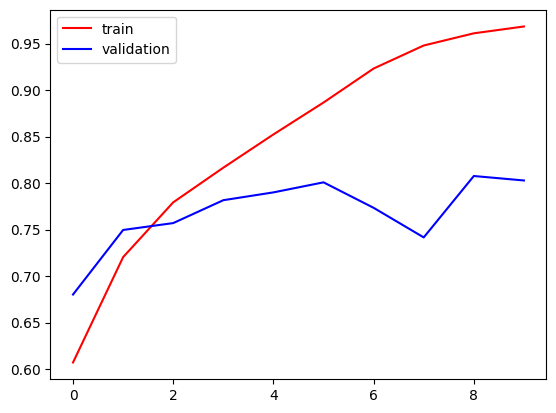

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

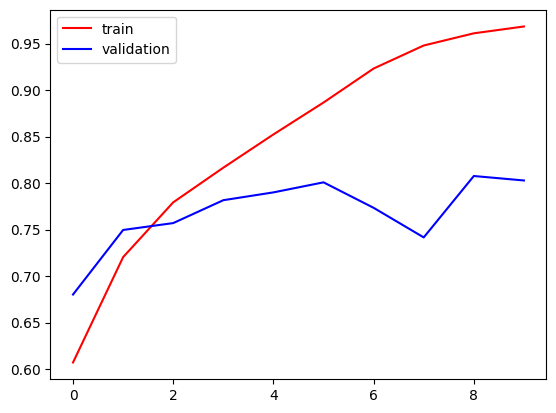

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

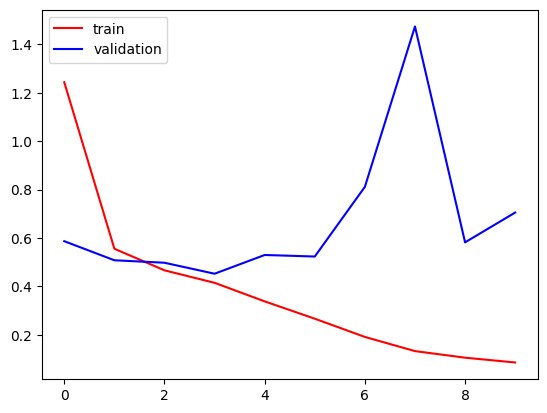

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

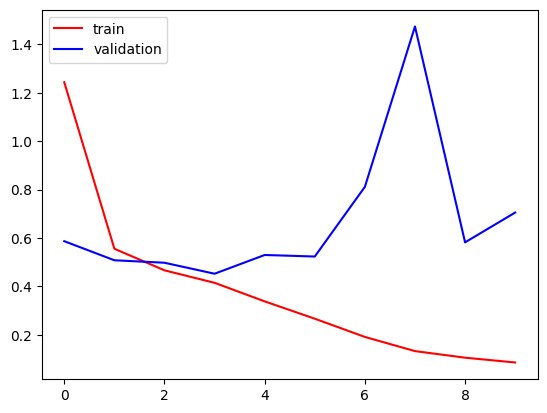

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.105.jpg')

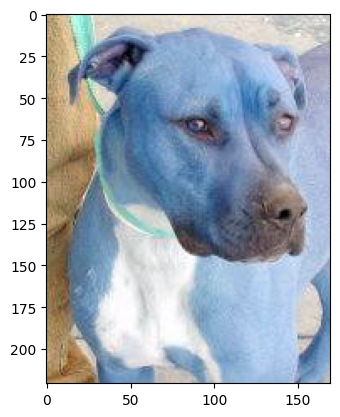

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 421ms/step


array([[1.]], dtype=float32)

In [ ]:
# The model has predicted 1

# And 1 is Dog.

In [ ]:
test_img2 = cv2.imread('/content/cat.54.jpg')

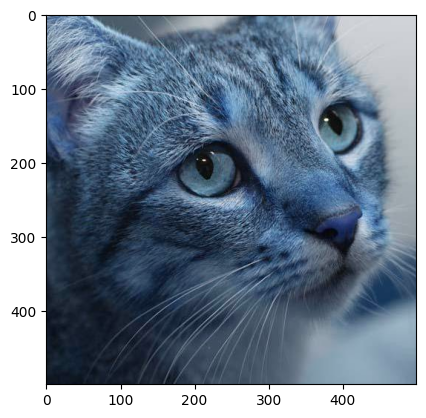

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2 = cv2.resize(test_img2,(256,256))

In [ ]:
test_input2 = test_img2.reshape((1,256,256,3))

In [ ]:
model.predict(test_input2)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

In [ ]:
# The model has predicted 0

# And 0 is Cat.